# Mini Project: Logistic Regression

Written by Adam Ten Hoeve  
COMP 4448 - Data Science Tools 2  
Summer 2021

In [1]:
# Load Required Libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem 2: Clustering and Logistic Regression

Load in the data and clean as needed. Data was taken from University of California Irvine's machine learning repository. Data can be found [here](https://archive.ics.uci.edu/ml/datasets/Wine).

Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1) Alcohol  
2) Malic acid  
3) Ash  
4) Alcalinity of ash  
5) Magnesium  
6) Total phenols  
7) Flavanoids  
8) Nonflavanoid phenols  
9) Proanthocyanins  
10)Color intensity  
11)Hue  
12)OD280/OD315 of diluted wines  
13)Proline  

In [2]:
# Load in the data
cols = ["label", "alcohol", "acid", "ash", "alcalinity", "Mg", "phenols", "flavanoids", "nonflavanoids", "proanthocyanins", "color", "hue", "od", "proline"]
df = pd.read_csv("wine.csv", header=None)
df.columns = cols
df.head()

,label,alcohol,acid,ash,alcalinity,Mg,phenols,flavanoids,nonflavanoids,proanthocyanins,color,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Look for missin values
df.isna().sum()

label              0
alcohol            0
acid               0
ash                0
alcalinity         0
Mg                 0
phenols            0
flavanoids         0
nonflavanoids      0
proanthocyanins    0
color              0
hue                0
od                 0
proline            0
dtype: int64

In [4]:
# Scale the data
scaler = MinMaxScaler()

X = df.drop("label", axis=1)
y = df["label"]

scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=cols[1:])
X.head()

,alcohol,acid,ash,alcalinity,Mg,phenols,flavanoids,nonflavanoids,proanthocyanins,color,hue,od,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [5]:
# Perform PCA on the data
pca = PCA()
pca.fit(X)
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

Text(0.5, 0, 'Number of points in node')

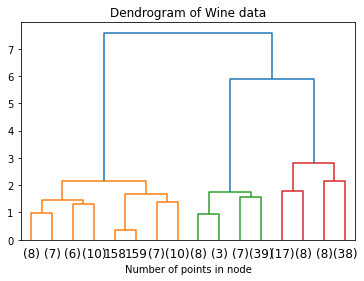

In [6]:
# Constrct a dendrogram with agglomerative clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X)

# Create linkage matrix and then plot the dendrogram
# create the counts of samples under each node
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

# Plot the corresponding dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title("Dendrogram of Wine data")
plt.xlabel("Number of points in node")

In [7]:
# Implement KMeans on the data
kmeans = KMeans(n_clusters=3, random_state=3)
kmeans.fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

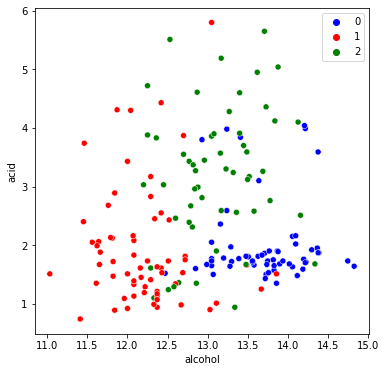

In [9]:
# Plot the clusters
# Use Alcohol and Acid as the axes
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data=df, x="alcohol", y="acid", hue=kmeans.labels_, palette=["blue", "red", "green"], ax=ax)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Sum of Squared Distances from Centroid')

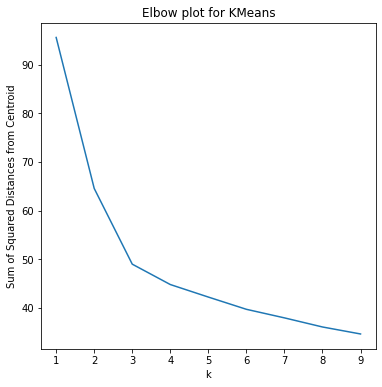

In [10]:
# Fine the optimal number of clusters using an elbow plot.
k_vals = np.arange(1, 10)
inertias = []
for k in k_vals:
    # Create a model with the desired number of clusters and fit it to the data
    model = KMeans(n_clusters=k)
    model.fit(X)
    # Determine the total sum of squared distances between the points and the centroids
    inertias.append(model.inertia_)
    
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lineplot(x=k_vals, y=inertias, ax=ax)
ax.set_title("Elbow plot for KMeans")
ax.set_xlabel("k")
ax.set_ylabel("Sum of Squared Distances from Centroid")

In [11]:
# Add cluster values to original dataset
df["cluster"] = kmeans.labels_
df.head()

,label,alcohol,acid,ash,alcalinity,Mg,phenols,flavanoids,nonflavanoids,proanthocyanins,color,hue,od,proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [14]:
# Fit a logistic regression model to the data
lr_clf = LogisticRegression()
lr_clf.fit(X, y)
lr_clf.score(X, y)

0.9887640449438202

In [15]:
# Use GridSearch to find the optimal C parameter
param_grid = {"C": np.arange(0.001, 1, 0.05)}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X, y)
grid.best_params_

{'C': 0.501}

In [16]:
# Find the accuaracy of the best logistic regression model
grid.best_estimator_.score(X, y)

0.9887640449438202

In [17]:
# Determine how well the clustering matched the labels
# Can use the rand index to determine this
adjusted_rand_score(kmeans.labels_, y)

0.8685425493202144